In [ ]:
import tensorflow as tf
from PIL import Image
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.utils import plot_model
from keras.optimizers import RMSprop
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from glob import glob
from keras.models import Model
from keras.layers import Flatten, Dense
from sklearn.metrics import classification_report, confusion_matrix
from keras.applications import ResNet50V2, MobileNetV2, ResNet101V2, EfficientNetB7
from keras.applications.efficientnet_v2 import EfficientNetV2M, EfficientNetV2L

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install rembg[gpu]
from rembg import remove
output = ["BGR","ORG","Crop"]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 71.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 KB

In [ ]:
# Changable parameters
mode = "Crop"
IMAGE_HEIGHT_WIDTH = 350

In [ ]:
if (mode == "BGR"):
#Training set background removal

  directory1 ='/content/drive/MyDrive/Projects/GP Project/Dataset/TrainSet'
  new_created1 = '/content/drive/MyDrive/Projects/GP Project/Dataset/BgRemoved/Training'

  for filename in glob(f'{directory1}/*'):
    folder = os.path.basename(filename)
    try:
      path1 = os.path.join(new_created1, folder)
      os.makedirs(path1)  
      for image in glob(f'{filename}/*'):
          image_extend = os.path.basename(image)
          input_path = image
          output_path = os.path.join(path1, image_extend)
          input = Image.open(input_path)
          output = remove(input)
          output.save(output_path)
    except FileExistsError:
      # directory already exists
      pass

#validition set background removal
  directory2 ='/content/drive/MyDrive/Projects/GP Project/Dataset/ValidationSet'
  new_created2 = '/content/drive/MyDrive/Projects/GP Project/Dataset/BgRemoved/Validation'

  for filename in glob(f'{directory2}/*'):
    folder = os.path.basename(filename)
    try:
      path2 = os.path.join(new_created2, folder)
      os.makedirs(path2)  
      for image in glob(f'{filename}/*'):
          image_extend = os.path.basename(image)
          input_path = image
          output_path = os.path.join(path2, image_extend)
          input = Image.open(input_path)
          output = remove(input)
          output.save(output_path)
    except FileExistsError:
      # directory already exists
      pass

#validition set background removal
  directory3 ='/content/drive/MyDrive/Projects/GP Project/Dataset/TestSet'
  new_created3 = '/content/drive/MyDrive/Projects/GP Project/Dataset/BgRemoved/Testing'

  try:  
    os.makedirs(new_created3)  
    for image in glob("/content/drive/MyDrive/Projects/GP Project/Dataset/TestSet/*.png"):
        image_extend = os.path.basename(image)
        input_path = image
        output_path = os.path.join(new_created3, image_extend)
        input = Image.open(input_path)
        output = remove(input)
        output.save(output_path)
  except FileExistsError:
    # directory already exists
    pass

else: pass



In [ ]:
train = ImageDataGenerator(rescale = 1./255)
validation = ImageDataGenerator(rescale = 1./255)
#train = ImageDataGenerator()
#validation = ImageDataGenerator()
if (mode == "ORG"):
  #training and validation with the original dataset
  train_dataset = train.flow_from_directory('/content/drive/MyDrive/Projects/GP Project/Dataset/TrainSet',
                                          target_size = (IMAGE_HEIGHT_WIDTH,IMAGE_HEIGHT_WIDTH),
                                          batch_size = 32,
                                          class_mode = "categorical")
  validation_dataset = validation.flow_from_directory('/content/drive/MyDrive/Projects/GP Project/Dataset/ValidationSet',
                                                    target_size = (IMAGE_HEIGHT_WIDTH,IMAGE_HEIGHT_WIDTH),
                                                    batch_size = 32,
                                                    class_mode = "categorical")
elif mode == "Crop":
    #training and validation with the cropped dataset
  train_dataset = train.flow_from_directory('/content/drive/MyDrive/Projects/GP Project/Dataset/croppedDatasetV2/trainSet',
                                          target_size = (IMAGE_HEIGHT_WIDTH,IMAGE_HEIGHT_WIDTH),
                                          batch_size = 32,
                                          class_mode = "categorical")
  validation_dataset = validation.flow_from_directory('/content/drive/MyDrive/Projects/GP Project/Dataset/croppedDatasetV2/validSet',
                                                    target_size = (IMAGE_HEIGHT_WIDTH,IMAGE_HEIGHT_WIDTH),
                                                    batch_size = 32,
                                                    class_mode = "categorical")
else:
  #training and validation with the background removal dataset
  train_dataset = train.flow_from_directory('/content/drive/MyDrive/Projects/GP Project/Dataset/BgRemoved/Training',
                                          target_size = (IMAGE_HEIGHT_WIDTH,IMAGE_HEIGHT_WIDTH),
                                          batch_size = 32,
                                          class_mode = "categorical")
  validation_dataset = validation.flow_from_directory('/content/drive/MyDrive/Projects/GP Project/Dataset/BgRemoved/Validation',
                                                    target_size = (IMAGE_HEIGHT_WIDTH,IMAGE_HEIGHT_WIDTH),
                                                    batch_size = 32,
                                                    class_mode = "categorical")

Found 900 images belonging to 15 classes.
Found 300 images belonging to 15 classes.


In [ ]:
train_dataset.class_indices
my_dic = dict(train_dataset.class_indices)
my_dic

{'drink': 0,
 'food': 1,
 'full': 2,
 'have': 3,
 'hello': 4,
 'i': 5,
 'i love you': 6,
 'police': 7,
 'prefer': 8,
 'shirt': 9,
 'telephone': 10,
 'water': 11,
 'wrong': 12,
 'yes': 13,
 'you': 14}

In [ ]:
if mode == "Crop":
  # useful for getting number of classes
  folders = glob('/content/drive/MyDrive/Projects/GP Project/Dataset/croppedDatasetV2/validSet/*')
elif mode == "ORG":
  folders = glob('/content/drive/MyDrive/Projects/GP Project/Dataset/ValidationSet/*')
else:
  folders = glob('/content/drive/MyDrive/Projects/GP Project/Dataset/BgRemoved/Validation/*')

# Model 1 VGG16

In [ ]:
vgg = VGG16(input_shape=(IMAGE_HEIGHT_WIDTH,IMAGE_HEIGHT_WIDTH,3), weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 350, 350, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 350, 350, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 350, 350, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 175, 175, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 175, 175, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 175, 175, 128)     147584    
                                                              

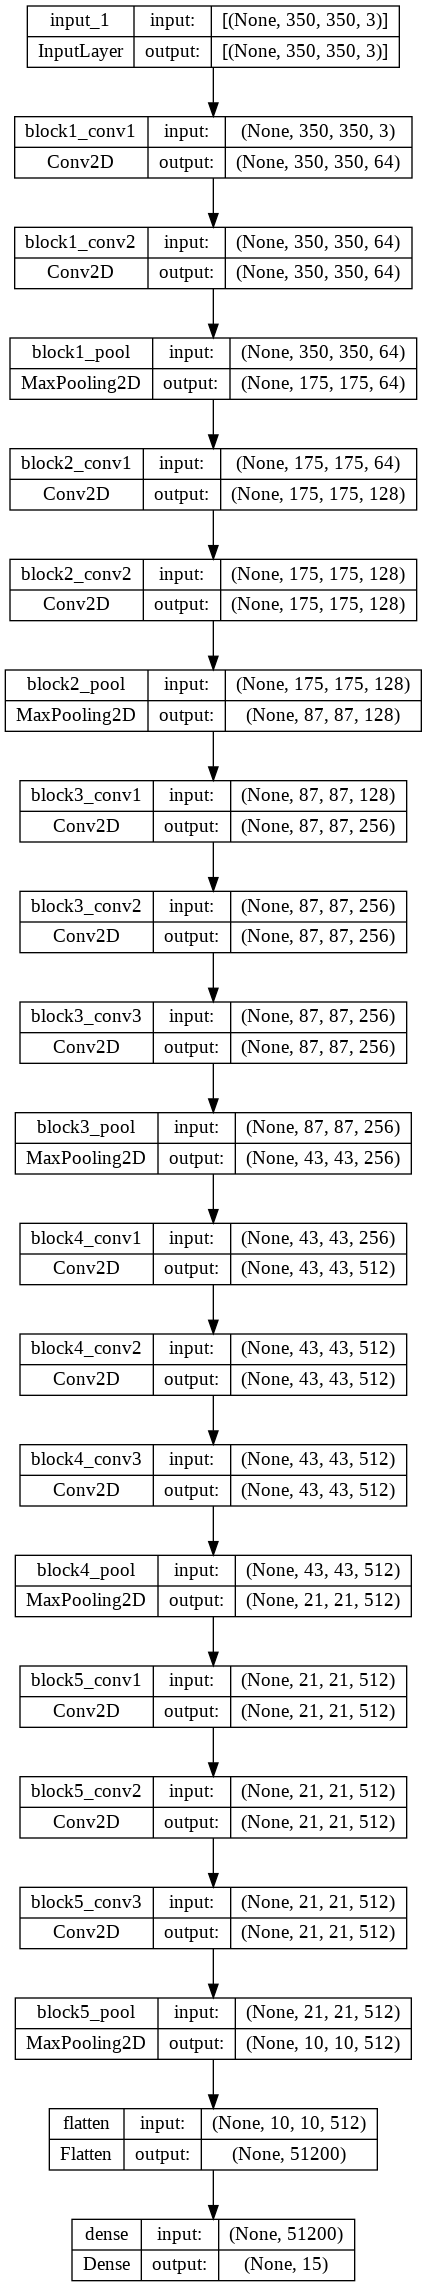

In [ ]:
plot_model(model, to_file = 'VGG16_model_structure_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=len(train_dataset), generator=train_dataset, validation_data=validation_dataset, validation_steps=len(validation_dataset), epochs=8, callbacks=[checkpoint,early])

<ipython-input-13-a96624464737>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(steps_per_epoch=len(train_dataset), generator=train_dataset, validation_data=validation_dataset, validation_steps=len(validation_dataset), epochs=8, callbacks=[checkpoint,early])


Epoch 1/8
29/29 [==============================] - ETA: 0s - loss: 1.6001 - accuracy: 0.6933
Epoch 1: val_accuracy improved from -inf to 0.81667, saving model to vgg16_1.h5
29/29 [==============================] - 25s 617ms/step - loss: 1.6001 - accuracy: 0.6933 - val_loss: 0.7056 - val_accuracy: 0.8167
Epoch 2/8
29/29 [==============================] - ETA: 0s - loss: 0.0181 - accuracy: 0.9956
Epoch 2: val_accuracy improved from 0.81667 to 0.89000, saving model to vgg16_1.h5
29/29 [==============================] - 14s 492ms/step - loss: 0.0181 - accuracy: 0.9956 - val_loss: 0.4656 - val_accuracy: 0.8900
Epoch 3/8
29/29 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 0.89000
29/29 [==============================] - 14s 491ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.4048 - val_accuracy: 0.8833
Epoch 4/8
29/29 [==============================] - ETA: 0s - loss: 4.7397e-04 - accuracy: 1.0000
Epoch 4: val_a

In [ ]:
#model.save('/content/drive/MyDrive/Projects/GP Project/Models/models_4/VGG16_Aug.h5')

# Model 2 VGG 19


In [ ]:
vgg1 = VGG19(input_shape=(IMAGE_HEIGHT_WIDTH,IMAGE_HEIGHT_WIDTH,3), weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg1.layers:
  layer.trainable = False
  
# our layers - you can add more if you want
x = Flatten()(vgg1.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model2 = Model(inputs=vgg1.input, outputs=prediction)

# view the structure of the model
model2.summary()

# tell the model what cost and optimization method to use
model2.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

80134624/80134624 [==============================] - 1s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 350, 350, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 350, 350, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 350, 350, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 175, 175, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 175, 175, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 175, 175, 128)     147584    
                                                            

In [ ]:
# plot_model(model2, to_file = 'VGG19_model_structure_plot.png', show_shapes = True, show_layer_names = True);

In [ ]:
hist2 = model2.fit_generator(steps_per_epoch=len(train_dataset), generator=train_dataset, validation_data=validation_dataset, validation_steps=len(validation_dataset), epochs=8)


<ipython-input-17-008b1d9de4e5>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist2 = model2.fit_generator(steps_per_epoch=len(train_dataset), generator=train_dataset, validation_data=validation_dataset, validation_steps=len(validation_dataset), epochs=8)


Epoch 1/8
29/29 [==============================] - 20s 687ms/step - loss: 1.6585 - accuracy: 0.6800 - val_loss: 0.8030 - val_accuracy: 0.7800
Epoch 2/8
29/29 [==============================] - 19s 657ms/step - loss: 0.0373 - accuracy: 0.9878 - val_loss: 0.4537 - val_accuracy: 0.9000
Epoch 3/8
29/29 [==============================] - 19s 660ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.4957 - val_accuracy: 0.8633
Epoch 4/8
29/29 [==============================] - 19s 661ms/step - loss: 6.6165e-04 - accuracy: 1.0000 - val_loss: 0.4247 - val_accuracy: 0.8833
Epoch 5/8
29/29 [==============================] - 19s 659ms/step - loss: 4.3024e-04 - accuracy: 1.0000 - val_loss: 0.4029 - val_accuracy: 0.8900
Epoch 6/8
29/29 [==============================] - 19s 663ms/step - loss: 3.6414e-04 - accuracy: 1.0000 - val_loss: 0.4094 - val_accuracy: 0.8900
Epoch 7/8
29/29 [==============================] - 19s 668ms/step - loss: 3.2744e-04 - accuracy: 1.0000 - val_loss: 0.4106 - val_accurac

In [ ]:
# model2.save('/content/drive/MyDrive/Projects/GP Project/Models/models_4/VGG19_Aug.h5')

# Model 3 ResNetV2 50

In [ ]:
res = ResNet50V2(include_top=False, weights="imagenet",input_shape=(IMAGE_HEIGHT_WIDTH,IMAGE_HEIGHT_WIDTH,3))

for layer in res.layers:
  layer.trainable = False  

# our layers - you can add more if you want
x = Flatten()(res.output)
predictions = Dense(len(folders), activation='softmax')(x)

# create a model object
model3 = Model(inputs = res.input, outputs = predictions)

# view the structure of the model
model3.summary()

# tell the model what cost and optimization method to use
model3.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 350, 350, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 356, 356, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 175, 175, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
hist3 = model3.fit_generator(steps_per_epoch=len(train_dataset), generator=train_dataset, validation_data=validation_dataset, validation_steps=len(validation_dataset), epochs=8)


<ipython-input-20-3203192e53eb>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist3 = model3.fit_generator(steps_per_epoch=len(train_dataset), generator=train_dataset, validation_data=validation_dataset, validation_steps=len(validation_dataset), epochs=8)


Epoch 1/8
29/29 [==============================] - 17s 406ms/step - loss: 3.6557 - accuracy: 0.8311 - val_loss: 5.3754 - val_accuracy: 0.8300
Epoch 2/8
29/29 [==============================] - 9s 308ms/step - loss: 0.2101 - accuracy: 0.9844 - val_loss: 5.6987 - val_accuracy: 0.8800
Epoch 3/8
29/29 [==============================] - 9s 305ms/step - loss: 0.0761 - accuracy: 0.9956 - val_loss: 4.0773 - val_accuracy: 0.8733
Epoch 4/8
29/29 [==============================] - 9s 303ms/step - loss: 0.0019 - accuracy: 0.9989 - val_loss: 3.0943 - val_accuracy: 0.8867
Epoch 5/8
29/29 [==============================] - 9s 304ms/step - loss: 8.9809e-06 - accuracy: 1.0000 - val_loss: 4.1809 - val_accuracy: 0.8733
Epoch 6/8
29/29 [==============================] - 9s 302ms/step - loss: 2.9997e-07 - accuracy: 1.0000 - val_loss: 4.2317 - val_accuracy: 0.8767
Epoch 7/8
29/29 [==============================] - 9s 300ms/step - loss: 7.9473e-10 - accuracy: 1.0000 - val_loss: 4.2347 - val_accuracy: 0.8767


In [ ]:
# model3.save('/content/drive/MyDrive/Projects/GP Project/Models/models_4/res50V2_Aug.h5')

# Model 4 MobileNetV2

In [ ]:
mobile = MobileNetV2(input_shape=(IMAGE_HEIGHT_WIDTH,IMAGE_HEIGHT_WIDTH,3), weights='imagenet', include_top=False)

# don't train existing weights
for layer in mobile.layers:
  layer.trainable = False

# our layers - you can add more if you want
x = Flatten()(mobile.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model4 = Model(inputs=mobile.input, outputs=prediction)

# view the structure of the model
model4.summary()

# tell the model what cost and optimization method to use
model4.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

9406464/9406464 [==============================] - 0s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 350, 350, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 175, 175, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 175, 175, 32  128         ['Conv1[0][0]']                  
                             

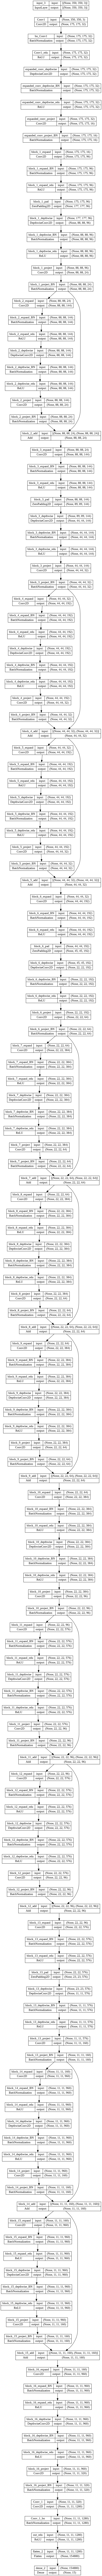

In [ ]:
# plot_model(model4, to_file = 'Mobile_model_structure_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
hist4 = model4.fit_generator(steps_per_epoch=len(train_dataset), generator=train_dataset, validation_data=validation_dataset, validation_steps=len(validation_dataset), epochs=8)


<ipython-input-23-9c4c5885c44e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist4 = model4.fit_generator(steps_per_epoch=len(train_dataset), generator=train_dataset, validation_data=validation_dataset, validation_steps=len(validation_dataset), epochs=8)


Epoch 1/8
29/29 [==============================] - 10s 240ms/step - loss: 3.3674 - accuracy: 0.8111 - val_loss: 5.7648 - val_accuracy: 0.8433
Epoch 2/8
29/29 [==============================] - 6s 190ms/step - loss: 0.2078 - accuracy: 0.9878 - val_loss: 1.6028 - val_accuracy: 0.9267
Epoch 3/8
29/29 [==============================] - 5s 185ms/step - loss: 0.0601 - accuracy: 0.9944 - val_loss: 1.7467 - val_accuracy: 0.8767
Epoch 4/8
29/29 [==============================] - 5s 188ms/step - loss: 0.0209 - accuracy: 0.9944 - val_loss: 2.8657 - val_accuracy: 0.8900
Epoch 5/8
29/29 [==============================] - 6s 216ms/step - loss: 0.0132 - accuracy: 0.9989 - val_loss: 3.0442 - val_accuracy: 0.8933
Epoch 6/8
29/29 [==============================] - 6s 196ms/step - loss: 0.0283 - accuracy: 0.9989 - val_loss: 2.5804 - val_accuracy: 0.9200
Epoch 7/8
29/29 [==============================] - 5s 187ms/step - loss: 3.9736e-09 - accuracy: 1.0000 - val_loss: 2.5707 - val_accuracy: 0.9200
Epoch 8/

In [ ]:
# model4.save('/content/drive/MyDrive/Projects/GP Project/Models/models_4/mobileV2_Aug.h5')

# Model 5 ResnetV2 101

In [ ]:
res1 = ResNet101V2(include_top=False, weights="imagenet",input_shape=(IMAGE_HEIGHT_WIDTH,IMAGE_HEIGHT_WIDTH,3))

for layer in res1.layers:
  layer.trainable = False  

# our layers - you can add more if you want
x = Flatten()(res1.output)
predictions = Dense(len(folders), activation='softmax')(x)

# create a model object
model5 = Model(inputs = res1.input, outputs = predictions)

# view the structure of the model
model5.summary()

# tell the model what cost and optimization method to use
model5.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 350, 350, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 356, 356, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 175, 175, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
hist5 = model.fit_generator(steps_per_epoch=len(train_dataset), generator=train_dataset, validation_data=validation_dataset, validation_steps=len(validation_dataset), epochs=8)


<ipython-input-26-5c3a1d30e576>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist5 = model.fit_generator(steps_per_epoch=len(train_dataset), generator=train_dataset, validation_data=validation_dataset, validation_steps=len(validation_dataset), epochs=8)


Epoch 1/8
29/29 [==============================] - 17s 584ms/step - loss: 1.7024e-04 - accuracy: 1.0000 - val_loss: 0.3290 - val_accuracy: 0.8867
Epoch 2/8
29/29 [==============================] - 16s 564ms/step - loss: 1.5853e-04 - accuracy: 1.0000 - val_loss: 0.3256 - val_accuracy: 0.8967
Epoch 3/8
29/29 [==============================] - 16s 556ms/step - loss: 1.4868e-04 - accuracy: 1.0000 - val_loss: 0.3223 - val_accuracy: 0.8967
Epoch 4/8
29/29 [==============================] - 16s 550ms/step - loss: 1.3946e-04 - accuracy: 1.0000 - val_loss: 0.3171 - val_accuracy: 0.8967
Epoch 5/8
29/29 [==============================] - 16s 551ms/step - loss: 1.3180e-04 - accuracy: 1.0000 - val_loss: 0.3175 - val_accuracy: 0.8900
Epoch 6/8
29/29 [==============================] - 16s 555ms/step - loss: 1.2439e-04 - accuracy: 1.0000 - val_loss: 0.3154 - val_accuracy: 0.8900
Epoch 7/8
29/29 [==============================] - 16s 559ms/step - loss: 1.1780e-04 - accuracy: 1.0000 - val_loss: 0.3127 -

In [ ]:
# model5.save('/content/drive/MyDrive/Projects/GP Project/Models/models_4/res101V2_Aug.h5')

# Model 6 EffcientNetB7

In [ ]:
b7 = EfficientNetB7(include_top=False, weights="imagenet",input_shape=(IMAGE_HEIGHT_WIDTH,IMAGE_HEIGHT_WIDTH,3))

for layer in b7.layers:
  layer.trainable = False  

# our layers - you can add more if you want
x = Flatten()(b7.output)
predictions = Dense(len(folders), activation='softmax')(x)

# create a model object
model10 = Model(inputs = b7.input, outputs = predictions)

# view the structure of the model
model10.summary()

# tell the model what cost and optimization method to use
model10.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 350, 350, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_3 (Rescaling)        (None, 350, 350, 3)  0           ['input_9[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 350, 350, 3)  7          ['rescaling_3[0][0]']            
 )                                                                                                
                                                                                            

In [ ]:
hist6 = model10.fit_generator(steps_per_epoch=len(train_dataset), generator=train_dataset, validation_data=validation_dataset, validation_steps=len(validation_dataset), epochs=25)


<ipython-input-44-9fc28cdfd247>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist6 = model10.fit_generator(steps_per_epoch=len(train_dataset), generator=train_dataset, validation_data=validation_dataset, validation_steps=len(validation_dataset), epochs=25)


Epoch 1/25
29/29 [==============================] - 59s 1s/step - loss: 275.8590 - accuracy: 0.0633 - val_loss: 194.1073 - val_accuracy: 0.0667
Epoch 2/25
29/29 [==============================] - 34s 1s/step - loss: 114.0945 - accuracy: 0.0578 - val_loss: 104.0416 - val_accuracy: 0.0667
Epoch 3/25
29/29 [==============================] - 34s 1s/step - loss: 96.7671 - accuracy: 0.0733 - val_loss: 114.0488 - val_accuracy: 0.0667
Epoch 4/25
29/29 [==============================] - 34s 1s/step - loss: 89.1577 - accuracy: 0.0611 - val_loss: 38.8240 - val_accuracy: 0.0367
Epoch 5/25
29/29 [==============================] - 34s 1s/step - loss: 52.9727 - accuracy: 0.0933 - val_loss: 53.0496 - val_accuracy: 0.1133
Epoch 6/25
29/29 [==============================] - 36s 1s/step - loss: 60.1636 - accuracy: 0.0800 - val_loss: 105.9130 - val_accuracy: 0.0667
Epoch 7/25
29/29 [==============================] - 36s 1s/step - loss: 76.6682 - accuracy: 0.1311 - val_loss: 53.6997 - val_accuracy: 0.0767


In [ ]:
# model6.save('/content/drive/MyDrive/Projects/GP Project/Models/models_4/effcientb7_Aug.h5')

# Model 7 EffcientNetV2M

In [ ]:
evm = EfficientNetV2M(include_top=False, weights="imagenet",input_shape=(IMAGE_HEIGHT_WIDTH,IMAGE_HEIGHT_WIDTH,3))

for layer in evm.layers:
  layer.trainable = False  

# our layers - you can add more if you want
x = Flatten()(evm.output)
predictions = Dense(len(folders), activation='softmax')(x)

# create a model object
model7 = Model(inputs = evm.input, outputs = predictions)

# view the structure of the model
model7.summary()

# tell the model what cost and optimization method to use
model7.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 350, 350, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 350, 350, 3)  0           ['input_7[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 175, 175, 24  648         ['rescaling_1[0][0]']            
                                )                                                                 
                                                                                            

In [ ]:
hist7 = model7.fit_generator(steps_per_epoch=len(train_dataset), generator=train_dataset, validation_data=validation_dataset, validation_steps=len(validation_dataset), epochs=25)


<ipython-input-32-d85625a7fa64>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist7 = model7.fit_generator(steps_per_epoch=len(train_dataset), generator=train_dataset, validation_data=validation_dataset, validation_steps=len(validation_dataset), epochs=25)


Epoch 1/25
29/29 [==============================] - 46s 895ms/step - loss: 140.9861 - accuracy: 0.0722 - val_loss: 124.5801 - val_accuracy: 0.0667
Epoch 2/25
29/29 [==============================] - 20s 705ms/step - loss: 68.5341 - accuracy: 0.0767 - val_loss: 54.1017 - val_accuracy: 0.0667
Epoch 3/25
29/29 [==============================] - 20s 687ms/step - loss: 44.0188 - accuracy: 0.0900 - val_loss: 33.6579 - val_accuracy: 0.1133
Epoch 4/25
29/29 [==============================] - 19s 668ms/step - loss: 37.2567 - accuracy: 0.1089 - val_loss: 32.9402 - val_accuracy: 0.0667
Epoch 5/25
29/29 [==============================] - 19s 672ms/step - loss: 39.8970 - accuracy: 0.0878 - val_loss: 55.3861 - val_accuracy: 0.0667
Epoch 6/25
29/29 [==============================] - 20s 689ms/step - loss: 47.7976 - accuracy: 0.0778 - val_loss: 50.8110 - val_accuracy: 0.0667
Epoch 7/25
29/29 [==============================] - 20s 688ms/step - loss: 44.2403 - accuracy: 0.0889 - val_loss: 43.5960 - val_

In [ ]:
# model7.save('/content/drive/MyDrive/Projects/GP Project/Models/models_4/effcientV2M_Aug.h5')

# Model 8 EffcientNetV2L

In [ ]:
evl = EfficientNetV2L(include_top=False, weights="imagenet",input_shape=(IMAGE_HEIGHT_WIDTH,IMAGE_HEIGHT_WIDTH,3))

for layer in evl.layers:
  layer.trainable = False  

# our layers - you can add more if you want
x = Flatten()(evl.output)
predictions = Dense(len(folders), activation='softmax')(x)

# create a model object
model8 = Model(inputs = evl.input, outputs = predictions)

# view the structure of the model
model8.summary()

# tell the model what cost and optimization method to use
model8.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 350, 350, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 350, 350, 3)  0           ['input_8[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 175, 175, 32  864         ['rescaling_2[0][0]']            
                                )                                                                 
                                                                                            

In [ ]:
hist8 = model8.fit_generator(steps_per_epoch=len(train_dataset), generator=train_dataset, validation_data=validation_dataset, validation_steps=len(validation_dataset), epochs=25)


In [ ]:
# model8.save('/content/drive/MyDrive/Projects/GP Project/Models/models_4/effcientV2L_Aug.h5')

# Models Comparison

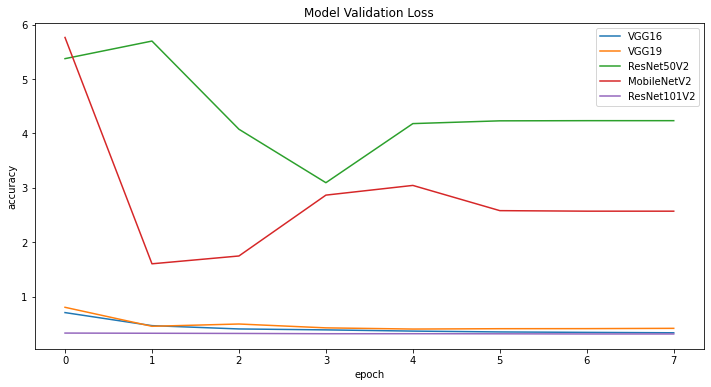

In [ ]:
plt.figure(figsize=(12,6)) 
plt.plot(hist.history['val_loss'])
plt.plot(hist2.history['val_loss'])
plt.plot(hist3.history['val_loss'])
plt.plot(hist4.history['val_loss'])
plt.plot(hist5.history['val_loss'])

plt.title('Model Validation Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['VGG16', 'VGG19',"ResNet50V2","MobileNetV2","ResNet101V2"])
plt.show()

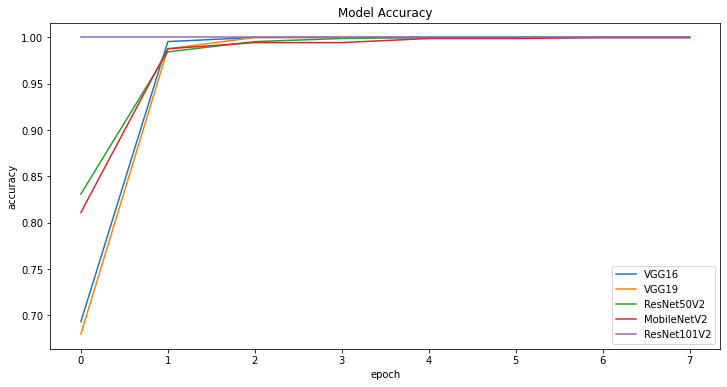

In [ ]:
plt.figure(figsize=(12,6)) 

plt.plot(hist.history['accuracy'])
plt.plot(hist2.history['accuracy'])
plt.plot(hist3.history['accuracy'])
plt.plot(hist4.history['accuracy'])
plt.plot(hist5.history['accuracy'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['VGG16', 'VGG19',"ResNet50V2","MobileNetV2","ResNet101V2"])
plt.show()

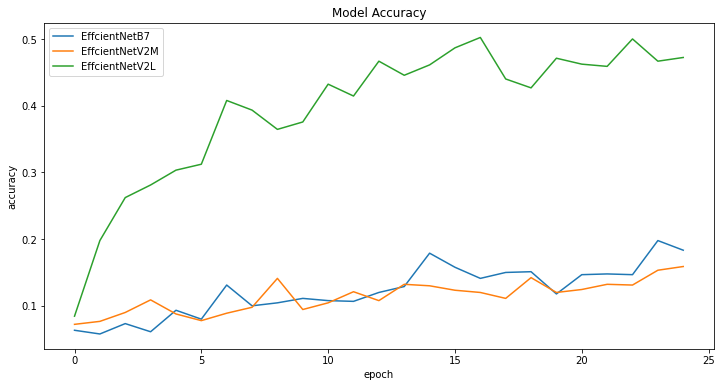

In [ ]:

plt.figure(figsize=(12,6)) 
plt.plot(hist6.history['accuracy'])
plt.plot(hist7.history['accuracy'])
plt.plot(hist8.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['EffcientNetB7', 'EffcientNetV2M',"EffcientNetV2L"])
plt.show()

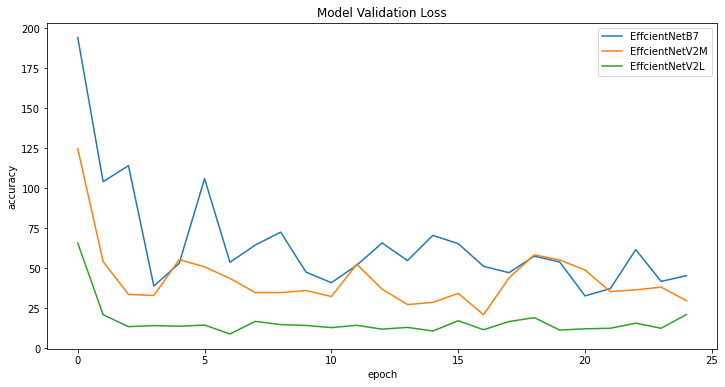

In [ ]:

plt.figure(figsize=(12,6)) 
plt.plot(hist6.history['val_loss'])
plt.plot(hist7.history['val_loss'])
plt.plot(hist8.history['val_loss'])
plt.title('Model Validation Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['EffcientNetB7', 'EffcientNetV2M',"EffcientNetV2L"])
plt.show()

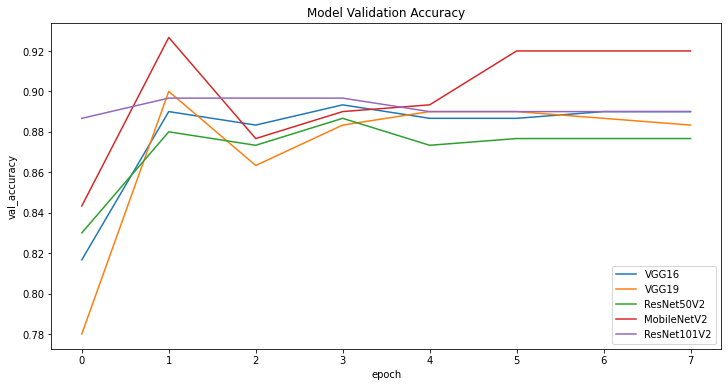

In [ ]:
plt.figure(figsize=(12,6)) 

plt.plot(hist.history['val_accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.plot(hist3.history['val_accuracy'])
plt.plot(hist4.history['val_accuracy'])
plt.plot(hist5.history['val_accuracy'])
plt.title('Model Validation Accuracy')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['VGG16', 'VGG19',"ResNet50V2","MobileNetV2","ResNet101V2"])
plt.show()

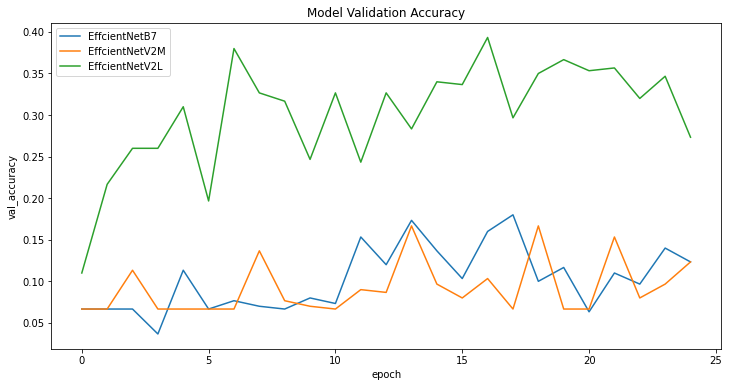

In [ ]:

plt.figure(figsize=(12,6)) 

plt.plot(hist6.history['val_accuracy'])
plt.plot(hist7.history['val_accuracy'])
plt.plot(hist8.history['val_accuracy'])
plt.title('Model Validation Accuracy')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['EffcientNetB7', 'EffcientNetV2M',"EffcientNetV2L"])
plt.show()